In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings("ignore")


In [12]:
def load_datasets(data_path='data/'):
    try:
        main = pd.read_csv(f'{data_path}dataset.csv')
        severity = pd.read_csv(f'{data_path}symptom_severity.csv')
        precautions = pd.read_csv(f'{data_path}symptom_precaution.csv')
        print("✅ Datasets Loaded Successfully!")
        return main, severity, precautions
    except Exception as e:
        print("❌ Error loading datasets:", e)
        return None, None, None


In [13]:
def analyze_diseases_and_symptoms(main_df):
    print("\n🔍 Disease Statistics:")
    disease_counts = main_df['Disease'].value_counts()
    print("Total Unique Diseases:", len(disease_counts))
    print(disease_counts.head(10))

    symptom_columns = [col for col in main_df.columns if col.startswith('Symptom_')]
    all_symptoms = []

    for col in symptom_columns:
        all_symptoms += main_df[col].dropna().str.strip().tolist()

    all_symptoms = [s for s in all_symptoms if s]
    symptom_counts = Counter(all_symptoms)

    print("\n🎯 Symptom Statistics:")
    print("Total Unique Symptoms:", len(symptom_counts))
    print(dict(symptom_counts.most_common(10)))

    return disease_counts, symptom_counts


In [14]:
def categorize_severity(severity_df):
    def triage_level(weight):
        if weight >= 7:
            return 'CRITICAL'
        elif weight >= 5:
            return 'HIGH'
        elif weight >= 3:
            return 'MODERATE'
        else:
            return 'LOW'

    severity_df['triage_level'] = severity_df['weight'].apply(triage_level)

    print("\n📊 Severity Range:", severity_df['weight'].min(), "-", severity_df['weight'].max())
    print("High Severity Symptoms:")
    print(severity_df[severity_df['weight'] >= 7][['Symptom', 'weight']].head())

    return severity_df


In [15]:
def analyze_precautions(precautions_df):
    precaution_cols = ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']
    all_precautions = []

    for col in precaution_cols:
        all_precautions += precautions_df[col].dropna().str.strip().tolist()

    precaution_counts = Counter(all_precautions)

    print("\n💊 Precaution Statistics:")
    print("Total Unique Precautions:", len(precaution_counts))
    print(dict(precaution_counts.most_common(10)))

    # Categorize by urgency
    def categorize(precaution):
        precaution = precaution.lower()
        if any(word in precaution for word in ['hospital', 'emergency', 'urgent', 'immediate']):
            return 'URGENT'
        elif any(word in precaution for word in ['rest', 'medication', 'consult']):
            return 'MODERATE'
        else:
            return 'ROUTINE'

    urgency = {'URGENT': [], 'MODERATE': [], 'ROUTINE': []}
    for precaution in all_precautions:
        urgency[categorize(precaution)].append(precaution)

    return precaution_counts, urgency


In [16]:
def plot_disease_distribution(disease_counts):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=disease_counts.index[:10], y=disease_counts.values[:10], palette="viridis")
    plt.xticks(rotation=45)
    plt.title("Top 10 Most Common Diseases")
    plt.xlabel("Disease")
    plt.ylabel("Count")
    plt.show()

def plot_symptom_frequency(symptom_counts):
    common_symptoms = dict(symptom_counts.most_common(15))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(common_symptoms.values()), y=list(common_symptoms.keys()), palette="rocket")
    plt.title("Top 15 Most Common Symptoms")
    plt.xlabel("Frequency")
    plt.ylabel("Symptom")
    plt.show()

def plot_severity_distribution(severity_df):
    triage_counts = severity_df['triage_level'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(triage_counts.values, labels=triage_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title("Triage Level Distribution")
    plt.show()

def plot_precaution_categories(urgency):
    urgency_counts = {k: len(v) for k, v in urgency.items()}
    plt.figure(figsize=(7, 4))
    sns.barplot(x=list(urgency_counts.keys()), y=list(urgency_counts.values()), palette="deep")
    plt.title("Precaution Urgency Categories")
    plt.xlabel("Urgency Level")
    plt.ylabel("Number of Precautions")
    plt.show()


In [17]:
# Load data
main_df, severity_df, precautions_df = load_datasets('data/')

# Analyze
disease_counts, symptom_counts = analyze_diseases_and_symptoms(main_df)
severity_df = categorize_severity(severity_df)
precaution_counts, urgency = analyze_precautions(precautions_df)


✅ Datasets Loaded Successfully!

🔍 Disease Statistics:
Total Unique Diseases: 41
Disease
Fungal infection       120
Allergy                120
GERD                   120
Chronic cholestasis    120
Drug Reaction          120
Peptic ulcer diseae    120
AIDS                   120
Diabetes               120
Gastroenteritis        120
Bronchial Asthma       120
Name: count, dtype: int64

🎯 Symptom Statistics:
Total Unique Symptoms: 131
{'fatigue': 1932, 'vomiting': 1914, 'high_fever': 1362, 'loss_of_appetite': 1152, 'nausea': 1146, 'headache': 1134, 'abdominal_pain': 1032, 'yellowish_skin': 912, 'yellowing_of_eyes': 816, 'chills': 798}

📊 Severity Range: 1 - 7
High Severity Symptoms:
                 Symptom  weight
25            high_fever       7
46   swelling_of_stomach       7
56            chest_pain       7
57     weakness_in_limbs       7
113                 coma       7

💊 Precaution Statistics:
Total Unique Precautions: 97
{'consult doctor': 15, 'medication': 10, 'eat healthy': 7, 

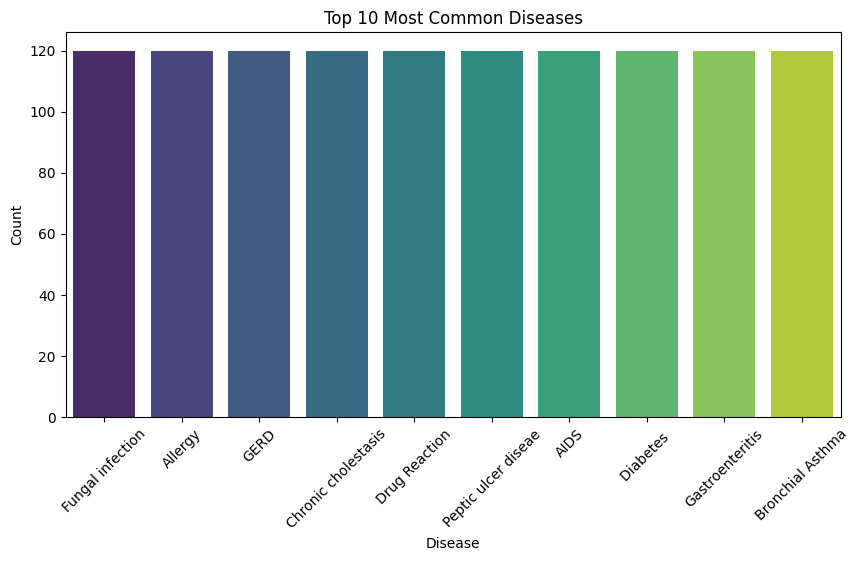

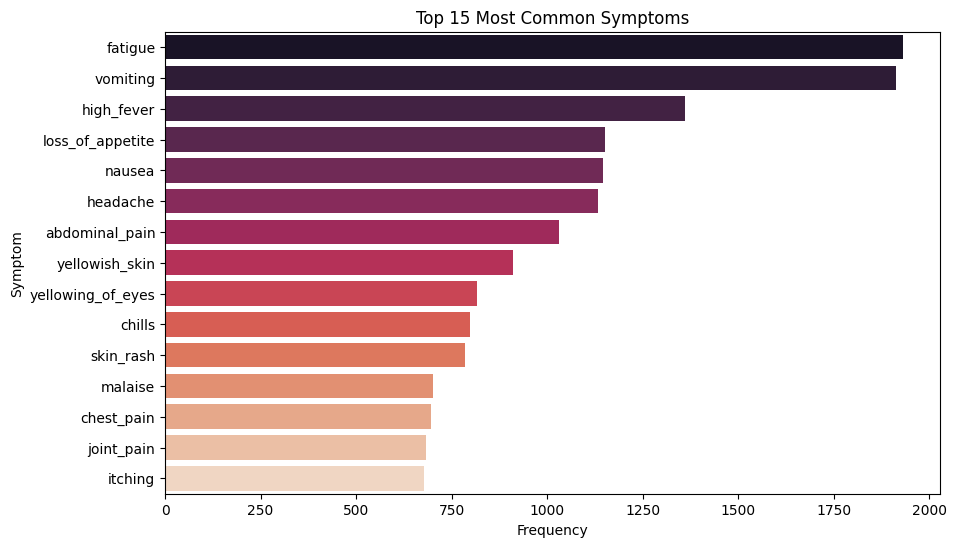

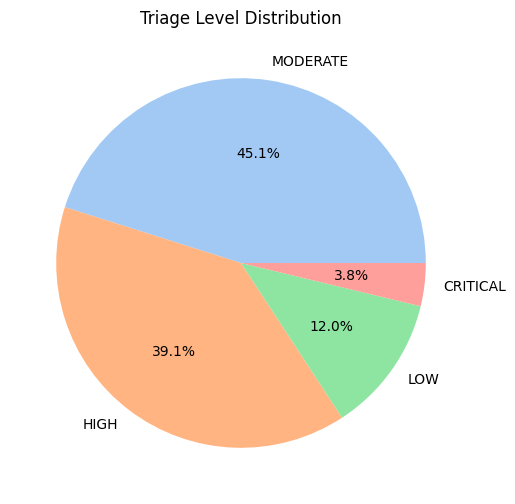

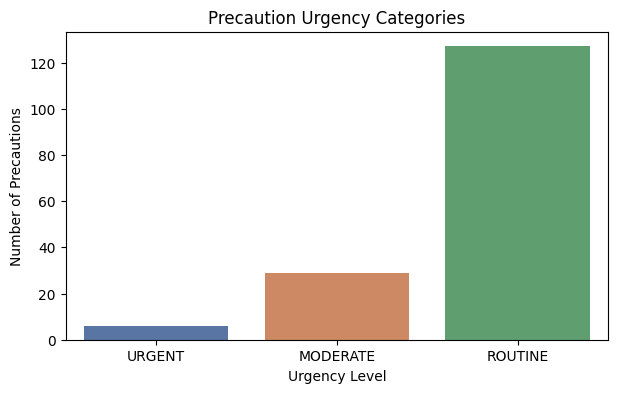

In [18]:
# Visualizations
plot_disease_distribution(disease_counts)
plot_symptom_frequency(symptom_counts)
plot_severity_distribution(severity_df)
plot_precaution_categories(urgency)
